In [1]:
import pandas as pd
import numpy as np

In [3]:
SAVE_ROOT = './saves/INTEGRATE_ProSE80d_pos1neg1/'
preds = pd.read_pickle(f'{SAVE_ROOT}preds.pkl')
genes = pd.read_pickle(f'{SAVE_ROOT}genes.pkl')
test_aucs = pd.read_pickle(f'{SAVE_ROOT}test_aucs.pkl')
test_auprcs = pd.read_pickle(f'{SAVE_ROOT}test_auprcs.pkl')

N = 10
# average AUC for test set
avgTestAUC = np.mean([v['auc'] for v in test_aucs.values()])
# average AUPRC for test set
avgTestAUPRC = np.mean([v['auprc'] for v in test_auprcs.values()])

In [5]:
print('AUROC value for {:.2f} and AUPRC value for {:.2f} in Test set'.format(avgTestAUC, avgTestAUPRC))

AUROC value for 0.77 and AUPRC value for 0.76 in Test set


# ROC curve

In [6]:
import matplotlib.pyplot as plt  
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

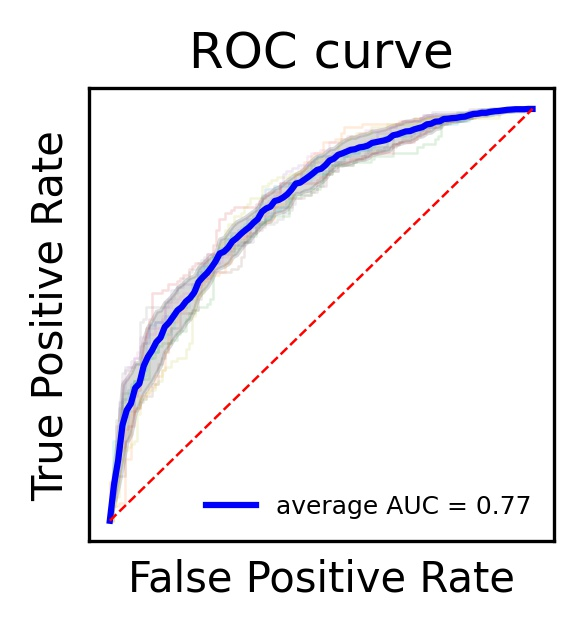

In [9]:
fig, ax = plt.subplots(
    figsize=(2, 2)
)

# test
tprs = list()
base_fpr = np.linspace(0, 1, 101)
for idx, test_auc in test_aucs.items():
    fpr, tpr = test_auc['fpr'], test_auc['tpr']
    ax.plot(
        fpr, tpr, 
        lw=LW, alpha=ALPHA,
        # label='Seed {}: {:.2f}'.format(idx, test_auc['auc'])
    )
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
ax.plot(base_fpr, mean_tprs, 'b', label='average AUC = {:.2f}'.format(avgTestAUC))
ax.fill_between(
    base_fpr, tprs_lower, 
    tprs_upper, color='grey', 
    alpha=0.3
)

ax.set_xlabel('False Positive Rate', fontsize=10)
ax.set_ylabel('True Positive Rate', fontsize=10)
ax.legend(loc="lower right", fontsize=6, frameon=False)
ax.set_title('ROC curve', pad=5, fontsize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.plot([0, 1], [0, 1], 'r--', lw=LW)

# Precision-Recall curve

[]

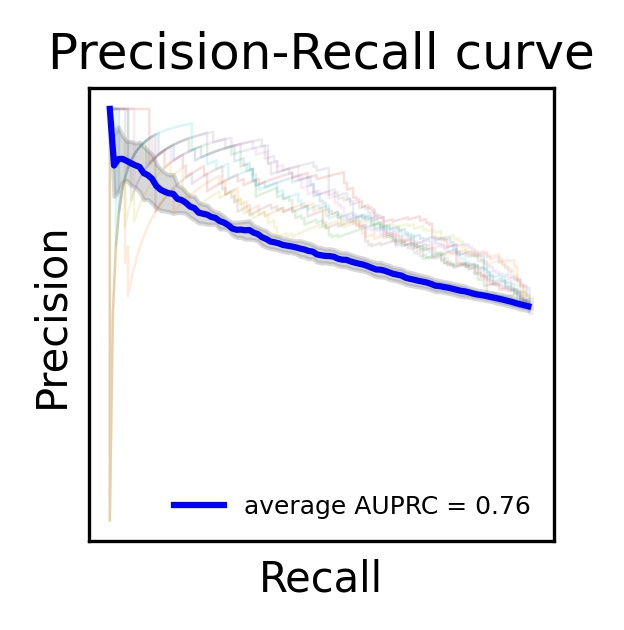

In [93]:
fig, ax = plt.subplots(
    figsize=(2, 2)
)

# test
precisions = list()
base_recall = np.linspace(0, 1, 101)
for idx, test_auprc in test_auprcs.items():
    recall, precision = test_auprc['rec'], test_auprc['pre']
    ax.plot(
        recall, precision, 
        lw=LW, alpha=ALPHA,
        # label='Seed {}: {:.2f}'.format(idx, test_auc['auc'])
    )
    precision = np.interp(base_recall, recall[::-1], precision)
    precision[0] = 0.0
    precisions.append(precision[::-1])
    
precisions = np.array(precisions)
mean_precisions = precisions.mean(axis=0)
std = precisions.std(axis=0)
precisions_upper = np.minimum(mean_precisions + std, 1)
precisions_lower = mean_precisions - std
ax.plot(base_recall[:-1], mean_precisions[:-1], 'b', label='average AUPRC = {:.2f}'.format(avgTestAUPRC))
ax.fill_between(
    base_recall[:-1], precisions_lower[:-1], 
    precisions_upper[:-1], color='grey', 
    alpha=0.3
)

ax.set_xlabel('Recall', fontsize=10)
ax.set_ylabel('Precision', fontsize=10)
ax.legend(loc="lower right", fontsize=6, frameon=False)
ax.set_title('Precision-Recall curve', pad=5, fontsize=12)
ax.set_xticks([])
ax.set_yticks([])

# ROC and PR curve

In [467]:
ALPHA = .15
LW = 1.8

AXIS_FONTSIZE = 30
LEGENDSIZE = 18
TITLESIZE = 36

[]

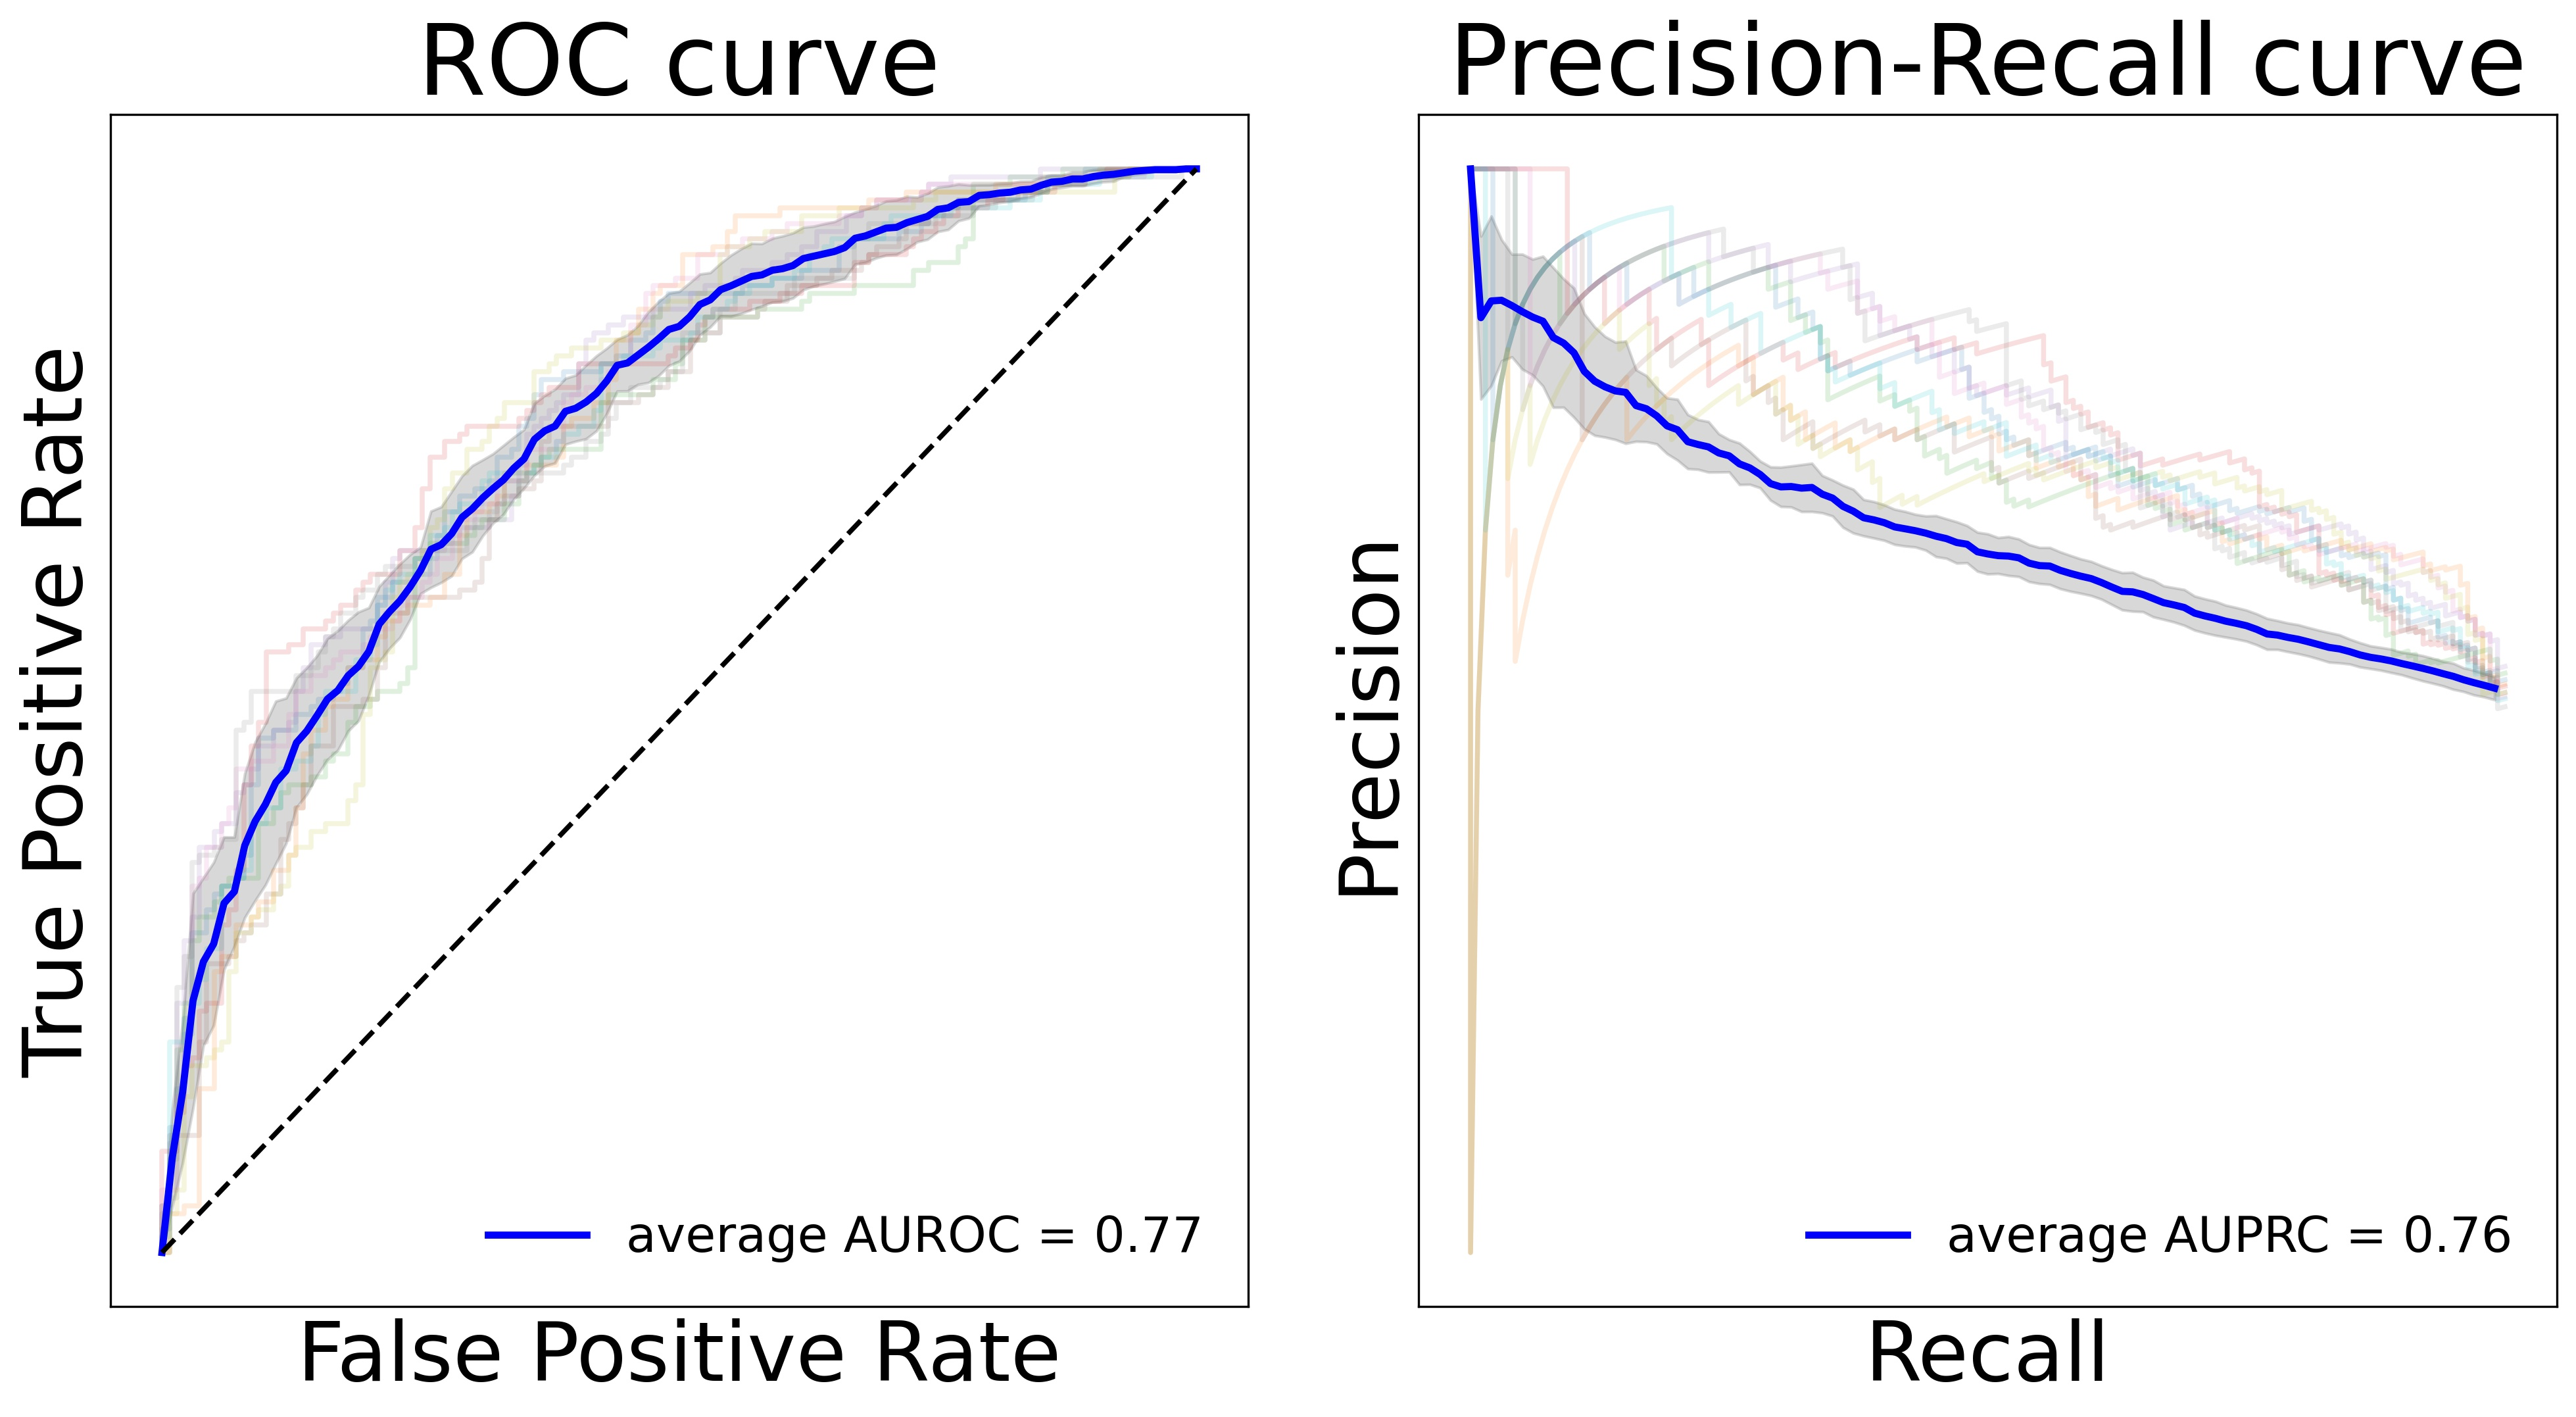

In [469]:
fig, (ax1, ax2) = plt.subplots(
    ncols = 2, nrows = 1,
    figsize=(16, 8)
)

fig.subplots_adjust(wspace=.15)

# ROC curve
tprs = list()
base_fpr = np.linspace(0, 1, 101)
for idx, test_auc in test_aucs.items():
    fpr, tpr = test_auc['fpr'], test_auc['tpr']
    ax1.plot(
        fpr, tpr, 
        lw=LW, alpha=ALPHA,
        # label='Seed {}: {:.2f}'.format(idx, test_auc['auc'])
    )
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
ax1.plot(base_fpr, mean_tprs, 'b', linewidth=LW+.8, label='average AUROC = {:.2f}'.format(avgTestAUC))
ax1.fill_between(
    base_fpr, tprs_lower, 
    tprs_upper, color='grey', 
    alpha=0.3
)

ax1.set_xlabel('False Positive Rate', fontsize=AXIS_FONTSIZE)
ax1.set_ylabel('True Positive Rate', fontsize=AXIS_FONTSIZE)
ax1.legend(loc="lower right", fontsize=LEGENDSIZE, frameon=False)
ax1.set_title('ROC curve', pad=5, fontsize=TITLESIZE)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.plot([0, 1], [0, 1], 'k--', lw=LW)

# Precision-Recall curve
precisions = list()
base_recall = np.linspace(0, 1, 101)
for idx, test_auprc in test_auprcs.items():
    recall, precision = test_auprc['rec'], test_auprc['pre']
    ax2.plot(
        recall, precision, 
        lw=LW, alpha=ALPHA,
        # label='Seed {}: {:.2f}'.format(idx, test_auc['auc'])
    )
    precision = np.interp(base_recall, recall[::-1], precision)
    precision[0] = 0.0
    precisions.append(precision[::-1])
    
precisions = np.array(precisions)
mean_precisions = precisions.mean(axis=0)
std = precisions.std(axis=0)
precisions_upper = np.minimum(mean_precisions + std, 1)
precisions_lower = mean_precisions - std
ax2.plot(base_recall[:-1], mean_precisions[:-1], 'b', linewidth=LW+.8, label='average AUPRC = {:.2f}'.format(avgTestAUPRC))
ax2.fill_between(
    base_recall[:-1], precisions_lower[:-1], 
    precisions_upper[:-1], color='grey', 
    alpha=0.3
)

ax2.set_xlabel('Recall', fontsize=AXIS_FONTSIZE)
ax2.set_ylabel('Precision', fontsize=AXIS_FONTSIZE)
ax2.legend(loc="lower right", fontsize=LEGENDSIZE, frameon=False)
ax2.set_title('Precision-Recall curve', pad=5, fontsize=TITLESIZE)
ax2.set_xticks([])
ax2.set_yticks([])

# AUROC and AUPRC with different pos-neg ratios
## pos: neg = 1: 1

In [188]:
c1 = pd.Series([test_aucs[i]['auc'] for i in range(N)])
c2 = pd.Series([test_auprcs[i]['auprc'] for i in range(N)])

In [189]:
eval_df = pd.concat([c1, c2], axis=1)
eval_df.columns = ['AUROC (1:1)', 'AUPRC (1:1)']
eval_df.index = ['model {}'.format(i) for i in range(N)]

## pos: neg = 1: 3

In [190]:
test_aucs_neg3 = pd.read_pickle(f'./saves/INTEGRATE_ProSE80d_pos1neg3/test_aucs.pkl')
test_auprcs_neg3 = pd.read_pickle(f'./saves/INTEGRATE_ProSE80d_pos1neg3/test_auprcs.pkl')

In [191]:
c3 = pd.Series([test_aucs_neg3[i]['auc'] for i in range(N)])
c4 = pd.Series([test_auprcs_neg3[i]['auprc'] for i in range(N)])

In [192]:
temp_df = pd.concat([c3, c4], axis=1)
temp_df.columns = ['AUROC (1:3)', 'AUPRC (1:3)']
temp_df.index = ['model {}'.format(i) for i in range(N)]
eval_df = pd.concat([eval_df, temp_df], axis=1)

## pos: neg = 1: 5

In [193]:
test_aucs_neg5 = pd.read_pickle(f'./saves/INTEGRATE_ProSE80d_pos1neg5/test_aucs.pkl')
test_auprcs_neg5 = pd.read_pickle(f'./saves/INTEGRATE_ProSE80d_pos1neg5/test_auprcs.pkl')

In [194]:
c5 = pd.Series([test_aucs_neg5[i]['auc'] for i in range(N)])
c6 = pd.Series([test_auprcs_neg5[i]['auprc'] for i in range(N)])

In [195]:
temp_df = pd.concat([c5, c6], axis=1)
temp_df.columns = ['AUROC (1:5)', 'AUPRC (1:5)']
temp_df.index = ['model {}'.format(i) for i in range(N)]
eval_df = pd.concat([eval_df, temp_df], axis=1)

## Original dataset

In [196]:
test_aucs_neg20 = pd.read_pickle(f'./saves/INTEGRATE_ProSE80d_pos1neg20/test_aucs.pkl')
test_auprcs_neg20 = pd.read_pickle(f'./saves/INTEGRATE_ProSE80d_pos1neg20/test_auprcs.pkl')

In [197]:
c7 = pd.Series([test_aucs_neg20[i]['auc'] for i in range(N)])
c8 = pd.Series([test_auprcs_neg20[i]['auprc'] for i in range(N)])

In [198]:
temp_df = pd.concat([c7, c8], axis=1)
temp_df.columns = ['AUROC (original)', 'AUPRC (original)']
temp_df.index = ['model {}'.format(i) for i in range(N)]
eval_df = pd.concat([eval_df, temp_df], axis=1)

In [202]:
eval_df

,AUROC (1:1),AUPRC (1:1),AUROC (1:3),AUPRC (1:3),AUROC (1:5),AUPRC (1:5),AUROC (original),AUPRC (original)
model 0,0.777858,0.771834,0.751548,0.550292,0.796478,0.434492,0.806569,0.158051
model 1,0.765540,0.709490,0.764643,0.476110,0.782431,0.419249,0.767000,0.140704
model 2,0.746493,0.752508,0.757345,0.515740,0.787438,0.442661,0.778439,0.138049
model 3,0.781585,0.780178,0.803237,0.615740,0.763005,0.426272,0.782384,0.155947
model 4,0.791056,0.790920,0.819644,0.580376,0.784359,0.432013,0.786634,0.135836
model 5,0.741939,0.717120,0.752618,0.539162,0.783675,0.394080,0.798689,0.169870
model 6,0.786709,0.781593,0.825768,0.633296,0.794135,0.447995,0.770459,0.152066
model 7,0.773097,0.781735,0.762486,0.502838,0.753851,0.416589,0.786138,0.158066
model 8,0.766523,0.716855,0.808102,0.580721,0.781882,0.376958,0.800781,0.157829
model 9,0.766058,0.761283,0.792437,0.526812,0.785697,0.398635,0.776969,0.149339


In [201]:
eval_df.mean(axis=0)

AUROC (1:1)         0.769686
AUPRC (1:1)         0.756352
AUROC (1:3)         0.783783
AUPRC (1:3)         0.552109
AUROC (1:5)         0.781295
AUPRC (1:5)         0.418894
AUROC (original)    0.785406
AUPRC (original)    0.151576
dtype: float64

## Visualization

In [239]:
dat1 = eval_df[[c for c in eval_df.columns if 'AUROC' in c]].copy()
dat1 = pd.concat([eval_df[c] for c in eval_df.columns if 'AUROC' in c]).to_frame().reset_index(drop=True)
dat1 = pd.concat([dat1, pd.Series([c.split(' ')[-1][1:-1] for c in eval_df.columns if 'AUROC' in c for _ in range(N)])], axis=1)
dat1.columns = ['AUROC', 'pos-neg-ratio']

In [241]:
dat2 = eval_df[[c for c in eval_df.columns if 'AUPRC' in c]].copy()
dat2 = pd.concat([eval_df[c] for c in eval_df.columns if 'AUPRC' in c]).to_frame().reset_index(drop=True)
dat2 = pd.concat([dat2, pd.Series([c.split(' ')[-1][1:-1] for c in eval_df.columns if 'AUPRC' in c for _ in range(N)])], axis=1)
dat2.columns = ['AUPRC', 'pos-neg-ratio']

In [470]:
ALPHA = .15
LW = 3

AXIS_FONTSIZE = 30
# LEGENDSIZE = 18
# TITLESIZE = 36
TICK_FONTSIZE = 18

In [471]:
import matplotlib.colors as mc
import colorsys
def lighten_color(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

Text(1.1, -0.1, 'Ratio between positive and negative samples')

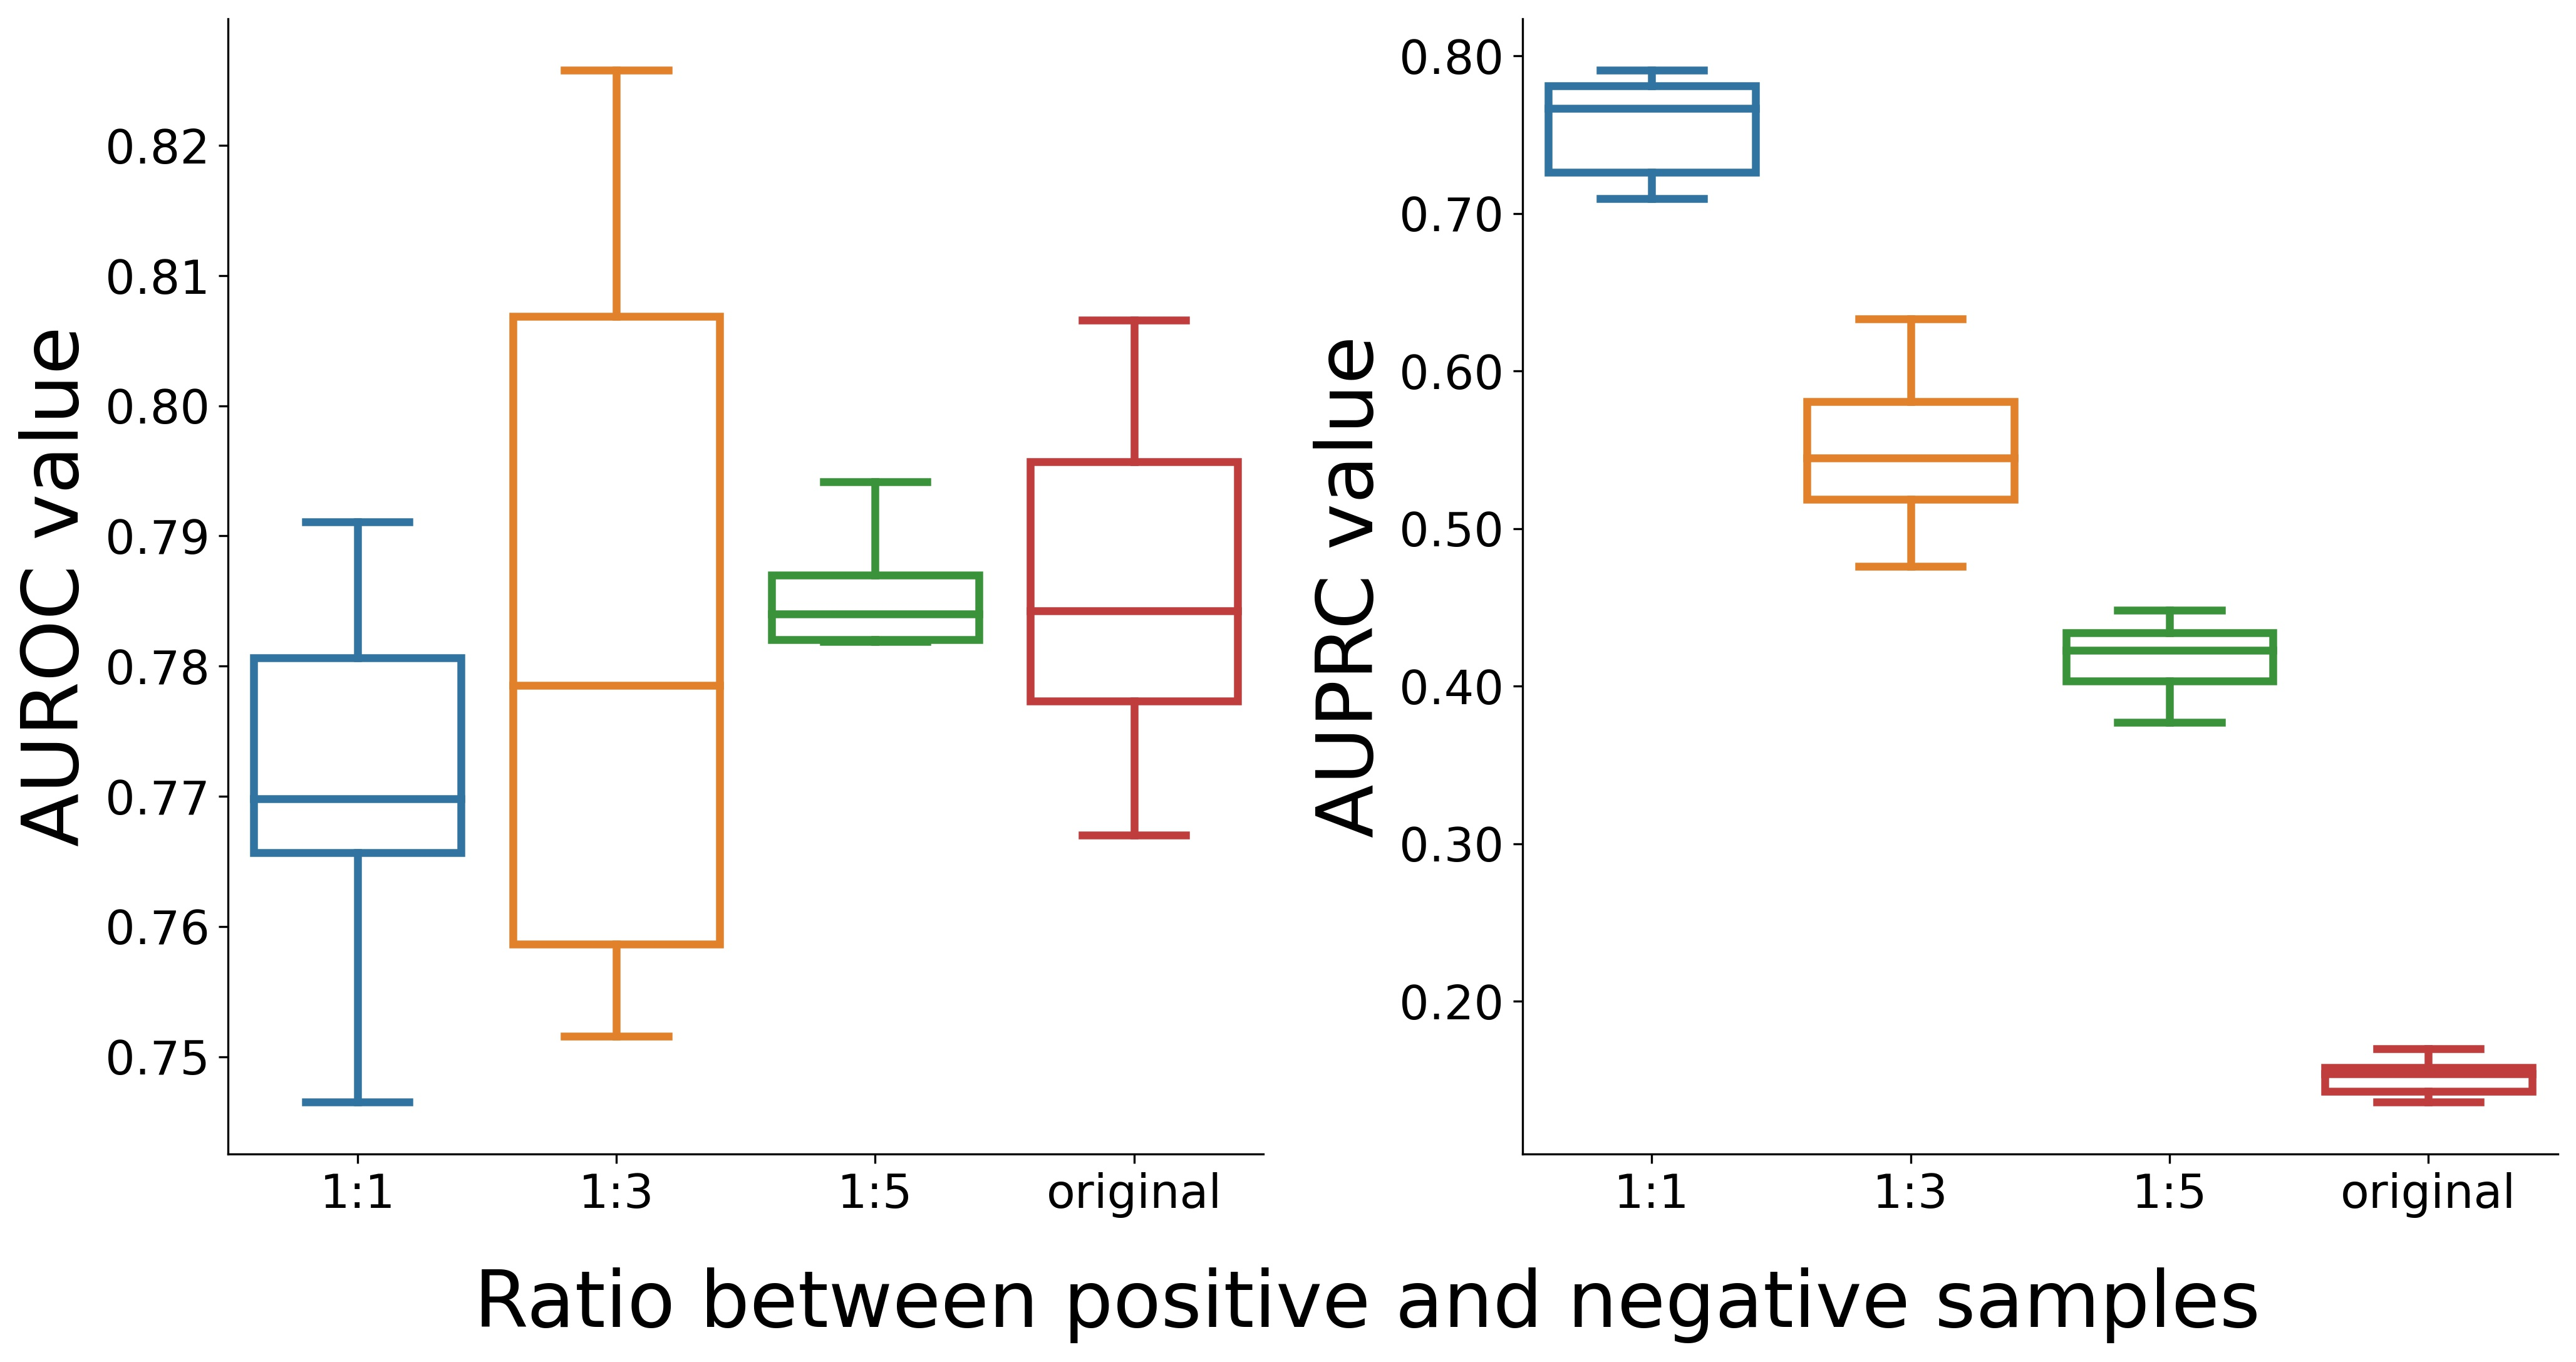

In [472]:
fig, (ax1, ax2) = plt.subplots(
    ncols = 2, nrows = 1,
    figsize=(16, 8)
)
fig.subplots_adjust(wspace=.25)

xticklabels = dat1['pos-neg-ratio'].drop_duplicates().tolist()
yticklabels_1 = ['{:.2f}'.format(i) for i in np.arange(.74, .83, .01)]
yticklabels_2 = ['{:.2f}'.format(i) for i in np.arange(.1, .9, .1)]

sns.boxplot(
    x = 'pos-neg-ratio',
    y = 'AUROC',
    data = dat1,
    showfliers = False,
    linewidth = LW,
    ax = ax1
)

ax1.set_xlabel(None)
ax1.set_ylabel('AUROC value', fontsize=AXIS_FONTSIZE)
ax1.set_xticklabels(xticklabels, size=TICK_FONTSIZE)
ax1.set_yticklabels(yticklabels_1, size=TICK_FONTSIZE)
for i in ['top', 'right']: ax1.spines[i].set_visible(False)
    
for i, artist in enumerate(ax1.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1)
    artist.set_edgecolor(col)
    artist.set_facecolor('white')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax1.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        # line.set_linewidth(0.5)   # ADDITIONAL ADJUSTMENT

sns.boxplot(
    x = 'pos-neg-ratio',
    y = 'AUPRC',
    data = dat2,
    showfliers = False,
    linewidth = LW,
    ax = ax2
)

ax2.set_xlabel(None)
ax2.set_ylabel('AUPRC value', fontsize=AXIS_FONTSIZE)
ax2.set_xticklabels(xticklabels, size=TICK_FONTSIZE)
ax2.set_yticklabels(yticklabels_2, size=TICK_FONTSIZE)
for i in ['top', 'right']: ax2.spines[i].set_visible(False)
    
for i, artist in enumerate(ax2.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1)
    artist.set_edgecolor(col)
    artist.set_facecolor('white')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax2.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        # line.set_linewidth(0.5)   # ADDITIONAL ADJUSTMENT

x_coord = 1.1  # 设置x轴标题在x轴上的中心位置
y_coord = -0.1  # 设置y轴标题在y轴上的位置（通过调整此值，可以控制标题与x轴之间的距离）
ax1.xaxis.set_label_coords(x_coord, y_coord)
ax1.set_xlabel('Ratio between positive and negative samples', fontsize=AXIS_FONTSIZE)

# AUROC with different node features

In [323]:
test_aucs_60d = pd.read_pickle(f'./saves/INTEGRATE_ProSE60d_pos1neg1/test_aucs.pkl')
test_aucs_80d = pd.read_pickle(f'./saves/INTEGRATE_ProSE80d_pos1neg1/test_aucs.pkl')
test_aucs_100d = pd.read_pickle(f'./saves/INTEGRATE_ProSE100d_pos1neg1/test_aucs.pkl')
test_aucs_120d = pd.read_pickle(f'./saves/INTEGRATE_ProSE120d_pos1neg1/test_aucs.pkl')
test_aucs_rand = pd.read_pickle(f'./saves/INTEGRATE_ProSErand_pos1neg1/test_aucs.pkl')

In [325]:
avgTestAUC_60d = np.mean([v['auc'] for v in test_aucs_60d.values()])
avgTestAUC_80d = np.mean([v['auc'] for v in test_aucs_80d.values()])
avgTestAUC_100d = np.mean([v['auc'] for v in test_aucs_100d.values()])
avgTestAUC_120d = np.mean([v['auc'] for v in test_aucs_120d.values()])
avgTestAUC_rand = np.mean([v['auc'] for v in test_aucs_rand.values()])

In [334]:
dat3 = pd.DataFrame({
    'ProSE-60d': [avgTestAUC_60d],
    'ProSE-80d': [avgTestAUC_80d],
    'ProSE-100d': [avgTestAUC_100d],
    'ProSE-120d': [avgTestAUC_120d],
    'rand.feat-80d': [avgTestAUC_rand]
}).T.reset_index()

dat3.columns = ['node_feature', 'AUROC']

In [335]:
dat3

,node_feature,AUROC
0,ProSE-60d,0.774623
1,ProSE-80d,0.769686
2,ProSE-100d,0.772791
3,ProSE-120d,0.767833
4,rand.feat-80d,0.731525


In [424]:
LW = .8

AXIS_FONTSIZE = 14
TICK_FONTSIZE = 8

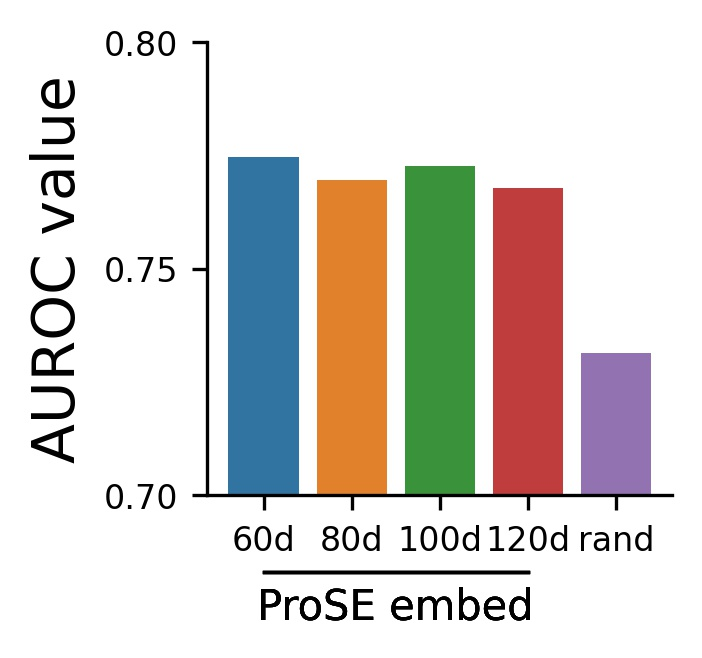

In [451]:
fig, ax = plt.subplots(
    figsize=(2, 2)
)

sns.barplot(
    x = 'node_feature',
    y = 'AUROC',
    data = dat3,
    ax = ax
)

ax.set_xlabel(None)
ax.set_ylabel('AUROC value', fontsize=AXIS_FONTSIZE)
ax.set_ylim([.7, .8])
ax.set_yticks([.7, .75, .8])
ax.set_xticklabels(['60d', '80d', '100d', '120d', 'rand'], rotation=0, size=TICK_FONTSIZE)
ax.set_yticklabels(['{:.2f}'.format(i) for i in [.7, .75, .8]], size=TICK_FONTSIZE)
for i in ['top', 'right']: ax.spines[i].set_visible(False)


trans = ax.get_xaxis_transform()
xticklabels = ax.get_xticklabels()[:4]
for xticklabel in xticklabels:
    ax.plot([ax.get_xticks()[0], ax.get_xticks()[3]], 
            [-.17, -.17], color='k', lw=LW, transform=trans, clip_on=False)  # 绘制横线
    ax.text((ax.get_xticks()[0] + ax.get_xticks()[3]) / 2, 
            ax.get_ylim()[0] - 0.02, 
            'ProSE embed', ha='center', va='top', color='k')  # 添加文字

# AUROC comparsion between real and random PPIN

In [474]:
test_aucs_rand = pd.read_pickle(f'./saves/RANDGRAPH_ProSE80d_pos1neg1/test_aucs.pkl')
avgTestAUC_rand = np.mean([v['auc'] for v in test_aucs_rand.values()])

In [489]:
print(avgTestAUC, avgTestAUC_rand)

0.7696858340665597 0.560592101858082


In [486]:
LW = .9

AXIS_FONTSIZE = 10
TICK_FONTSIZE = 8
LEGENDSIZE = 6
TITLESIZE = 12

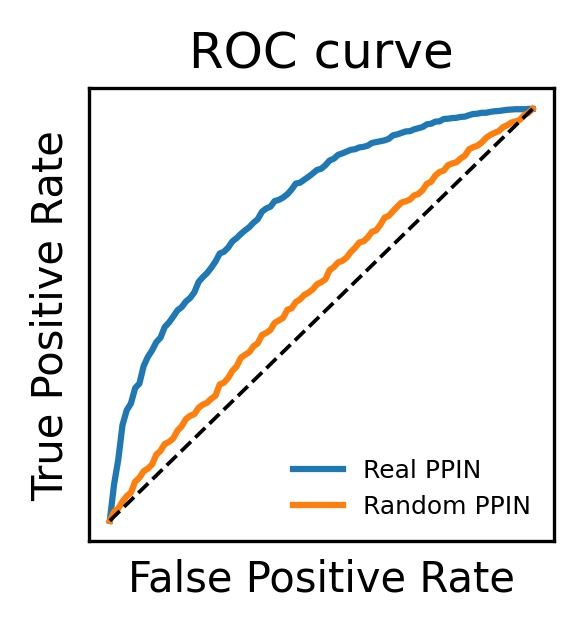

In [487]:
fig, ax = plt.subplots(
    figsize=(2, 2)
)

# real graph
tprs = list()
base_fpr = np.linspace(0, 1, 101)
for idx, test_auc in test_aucs.items():
    fpr, tpr = test_auc['fpr'], test_auc['tpr']
#     ax.plot(
#         fpr, tpr, 
#         lw=LW, alpha=ALPHA,
#         # label='Seed {}: {:.2f}'.format(idx, test_auc['auc'])
#     )
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
ax.plot(base_fpr, mean_tprs, label='Real PPIN')
# ax.fill_between(
#     base_fpr, tprs_lower, 
#     tprs_upper, color='grey', 
#     alpha=0.3
# )

# random graph
tprs = list()
base_fpr = np.linspace(0, 1, 101)
for idx, test_auc in test_aucs_rand.items():
    fpr, tpr = test_auc['fpr'], test_auc['tpr']
#     ax.plot(
#         fpr, tpr, 
#         lw=LW, alpha=ALPHA,
#         # label='Seed {}: {:.2f}'.format(idx, test_auc['auc'])
#     )
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
ax.plot(base_fpr, mean_tprs, label='Random PPIN')
# ax.fill_between(
#     base_fpr, tprs_lower, 
#     tprs_upper, color='grey', 
#     alpha=0.3
# )

ax.set_xlabel('False Positive Rate', fontsize=AXIS_FONTSIZE)
ax.set_ylabel('True Positive Rate', fontsize=AXIS_FONTSIZE)
ax.legend(loc="lower right", fontsize=LEGENDSIZE, frameon=False)
ax.set_title('ROC curve', pad=5, fontsize=TITLESIZE)
ax.set_xticks([])
ax.set_yticks([])
ax.plot([0, 1], [0, 1], 'k--', lw=LW)

# Probabilities of proteins within PPIN

In [491]:
phasep_df = pd.read_pickle('./data/Label/human.condensate-formation.proteins-v1.pkl')
lt = set(phasep_df[phasep_df['source']=='literature']['uniprot_entry'])
pr = set(phasep_df[phasep_df['source']=='phasepred']['uniprot_entry'])
pr = pr - lt
dp = set(phasep_df[phasep_df['source']=='deepphase']['uniprot_entry'])
dp = dp - pr - lt

In [492]:
predict = pd.DataFrame({
    'entry': genes
})
for i in range(N): predict[i] = np.squeeze(preds[i])
predict['pred'] = predict.iloc[:, 1:].mean(axis=1)

predict.loc[predict['entry'].isin(lt), 'type'] = 'literature'
predict.loc[predict['entry'].isin(dp), 'type'] = 'deepphase'
predict.loc[predict['entry'].isin(pr), 'type'] = 'phasepred'
predict['type'] = predict['type'].fillna('nc')

In [493]:
predict.groupby('type')['pred'].median()

type
deepphase     0.400664
literature    0.730717
nc            0.347237
phasepred     0.608676
Name: pred, dtype: float32

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

phasepred v.s. deepphase: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.963e-100 U_stat=1.342e+06
deepphase v.s. nc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.825e-13 U_stat=1.105e+07
phasepred v.s. nc: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.687e-228 U_stat=1.131e+07


(<matplotlib.axes._subplots.AxesSubplot at 0x7f702ad41090>,
  <statannot.StatResult.StatResult at 0x7f7029c36b10>])

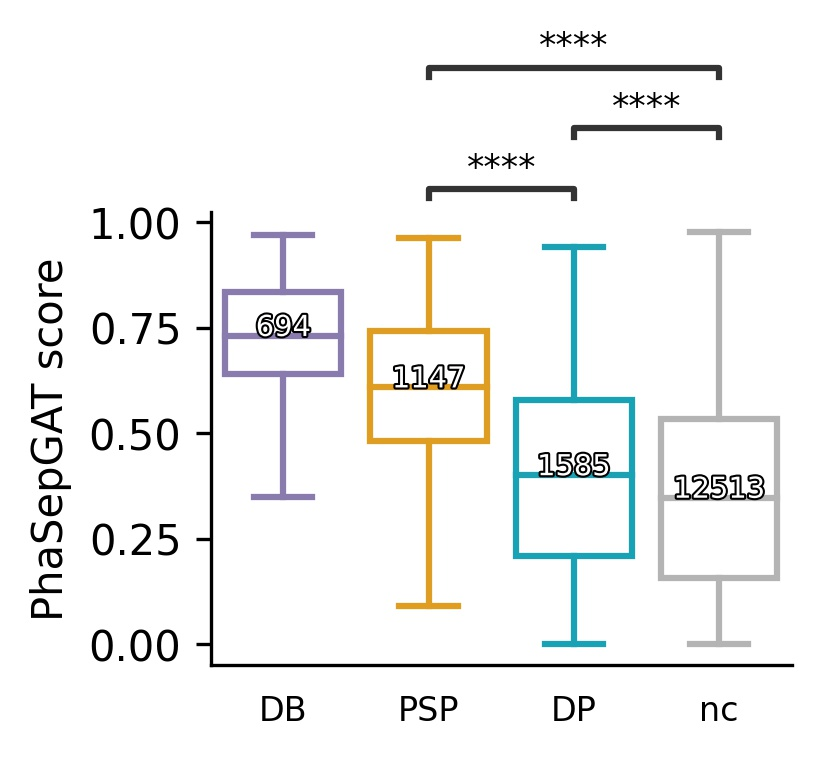

In [494]:
fig, ax = plt.subplots(figsize=(2.5, 2))

colors = ['#8673B6', '#FFA702', '#00B5CE', '#B3B4B3']
order=['literature', 'phasepred', 'deepphase', 'nc']
from itertools import combinations
box_pairs = [i for i in combinations(order[1:], 2)]
x, y = 'type', 'pred'

sns.boxplot(
    x = x,
    y = y,
    order=order,
    data=predict,
    palette=colors,
    showfliers=False,
    ax=ax
)

ax.set_xlabel(None)
ax.set_ylabel('PhaSepGAT score', size=10)
ax.set_xticklabels(['DB', 'PSP', 'DP', 'nc'], size=8)

ax.tick_params(
    axis='both',
    which='major',
    bottom=False
)
for i in ['right','top']:
    ax.spines[i].set_visible(False)

import matplotlib.colors as mc
import colorsys
def lighten_color(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
    
for i, artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1)
    artist.set_edgecolor(col)
    artist.set_facecolor('white')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*5,i*5+5):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        # line.set_linewidth(0.5)   # ADDITIONAL ADJUSTMENT
    
import matplotlib.patheffects as path_effects
medians = predict.groupby([x])[y].median().to_frame().loc[order][y].values
nobs = predict[x].value_counts().to_frame().loc[order][x].values
nobs = [str(x) for x in nobs.tolist()]
# nobs = ["n = " + i for i in nobs]
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    text = ax.text(pos[tick],
                   medians[tick],
                   nobs[tick],
                   horizontalalignment='center',
                   size='x-small',
                   color='w')
    # create median-colored border around white text for contrast
    text.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='k'),
        path_effects.Normal(),
    ])
    
from statannot import add_stat_annotation
add_stat_annotation(
    ax, x=x, y=y, data=predict,
    order=order, box_pairs=box_pairs,
    test='Mann-Whitney', 
    comparisons_correction='bonferroni',
    text_format='star', 
    loc='outside', 
    verbose=2, 
    fontsize='small'
)